In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from wordcloud import WordCloud
#if encounter error: No module named 'wordcloud'
#run the line below

import folium
from folium.plugins import HeatMap
#if encounter error: No module named 'folium'
#run the line below

import plotly.offline as pyo
import plotly.graph_objs as go
#if encounter error: No module named 'plotly'
#run the line below

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#!pip install wordcloud
#pip install plotly
#conda install -c conda-forge folium

In [3]:
# Import the dataset
airbnb_data = pd.read_csv("PredictPrice.csv")
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_data.head(5)

,id,new_host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bedrooms,beds,number_of_reviews,availability_365,price
0,50646.0,65.0,f,Bukit Timah,Central Region,1.33432,103.78521,Private room,1.0,1.0,18.0,365.0,80.0
1,71609.0,65.0,f,Tampines,East Region,1.34537,103.95887,Private room,2.0,3.0,20.0,365.0,179.0
2,71896.0,65.0,f,Tampines,East Region,1.34754,103.95958,Private room,1.0,1.0,24.0,365.0,82.0
3,71903.0,65.0,f,Tampines,East Region,1.34531,103.96100,Private room,1.0,2.0,47.0,365.0,82.0
4,275343.0,77.0,f,Bukit Merah,Central Region,1.29015,103.80814,Private room,1.0,1.0,20.0,341.0,52.0


## top region area

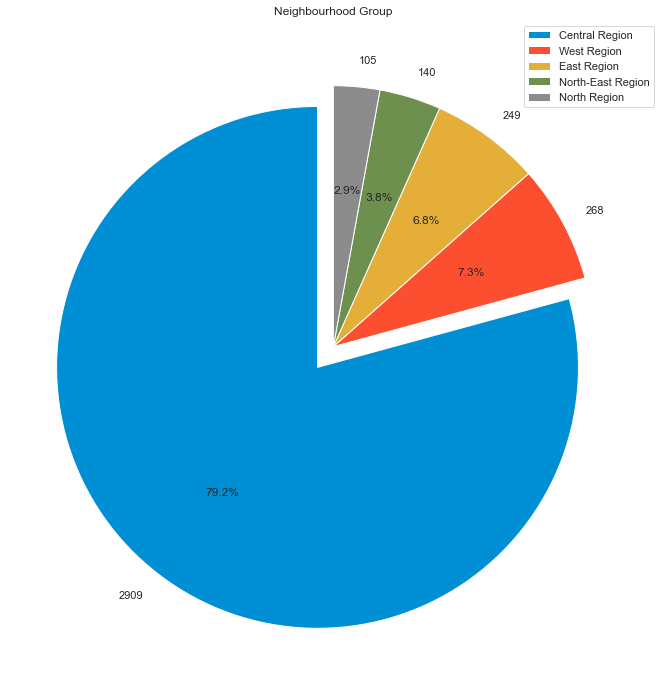

In [4]:
labels = airbnb_df.neighbourhood_group_cleansed.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0)
shape = airbnb_df.neighbourhood_group_cleansed.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

__From the chart above,We noticed that Central Region has the most listings with almost 2909 listings covering more than 79.2% 
of the listing.__

## Top neighbourhood area

In [6]:
airbnb_df.neighbourhood_cleansed.value_counts().head(10)

Kallang          405
Geylang          340
Downtown Core    317
Outram           309
Rochor           270
Novena           235
Bedok            186
Bukit Merah      178
River Valley     149
Queenstown       143
Name: neighbourhood_cleansed, dtype: int64

__Kallang has the highest number of listings (405), We also noticed that 9 out of the 10 neighbourhood areas are located
 in the central region excepted bedok which is located at the east region.__

##  listings Density Map using heatmap

In [8]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(airbnb_df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

__from the map above, We can observed that the central region is the region where the densest listing is located. 
the Listing density increasing decline as it move away from the central region.__

In [10]:
##embedding image from https://cdn-cms.pgimgs.com/static/2019/12/ccr-ocr-rcr-city-fringe-singapore-property-ura-map.jpg
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-cms.pgimgs.com/static/2019/12/ccr-ocr-rcr-city-fringe-singapore-property-ura-map.jpg")

## Average price by neigbourhood

In [14]:
# get revenue by listings
revenuebyneigbourhood = airbnb_df[['neighbourhood_cleansed','price']].groupby(['neighbourhood_cleansed']).mean()
# pd_listings_revenue['listing_id'] = pd_listings_revenue.index
revenuebyneigbourhood_sorted = revenuebyneigbourhood.sort_values(by='price', ascending=False)
revenuebyneigbourhood_sorted

,price
neighbourhood_cleansed,
Southern Islands,1877.888889
Orchard,643.050000
Marina South,546.000000
Pasir Ris,355.333333
Singapore River,337.462963
Lim Chu Kang,337.000000
Newton,313.666667
Pioneer,305.000000
Tanglin,302.811111


The Urban Redevelopment Authority (URA) has divided Singapore into three main regions, which the URA calls "market segments".
The Core Central Region, also known as the CCR, includes the traditional prime areas of Singapore and the downtowncore.This is where most high-end, luxury properties in Singapore can be found. Many of the private residental properties in the CCR are also freehold which suggests why the listing price in these region are most expensive(e.g City,Sentosa,Orchard)

the Rest of Central Region, also known as the RCR, is sandwiched between the CCR and the Outside Central Region (OCR).The RCR is regarded as the intermediate, or mid-tier, when compared to CCR which suggests that in these region are moderate
expensive (e.g region Telok Blangah,Pasir Panjang).

The last one is the OCR, indicated by the grey color that covers three-quarters of the size of Singapore
basically the area where mass-market condos at the lower range are located.

The average price table also show simillar trend with southern island,orchard,marina south,singapore river topping the average price chart as they are located in the prime area core central region. Example will be southern island having the highest average price $1877 followed by orchard $643.

Followed by the Rest of the central region being moderate expensive. For example Queenstown, toa payoh have the average price of $223 dollar.

The OCR outside of central region is the cheapest place to rent. For example Jurong west, the average is $97 dollars and mandai is $43 dollar.

By looking at two maps above, we could argue that the Airbnb listing price is related to the region and negibhourhood. But to conclude that, we need more data to do further analysis.


## Price Distribution

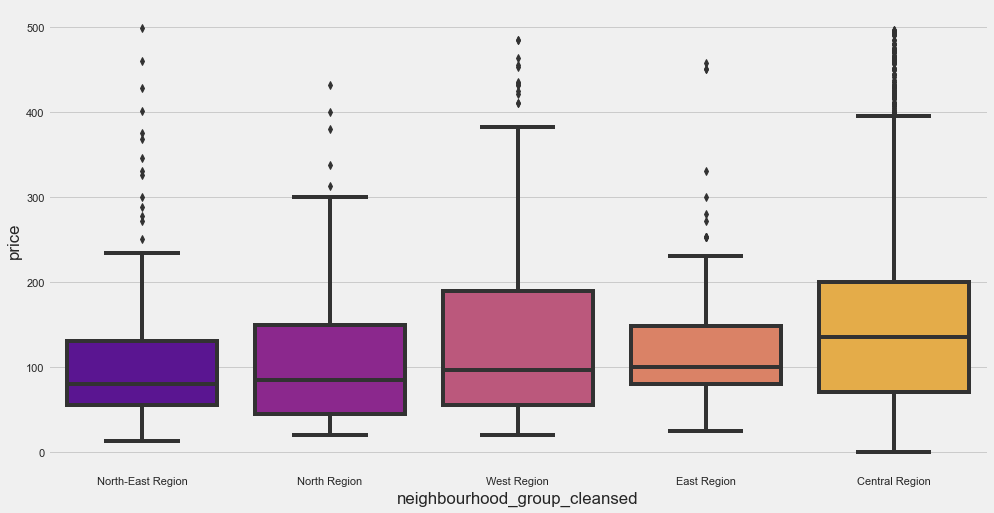

In [22]:
##For a clear visualization, the team decided to set the price range to less than 500 to visualize trend easily as the outlier
##range is very huge 1000,2000 etc which will affect the visualization. The team will still keep these outlier for model building.
airbnb_1 = airbnb_df[airbnb_df.price < 500]
plt.figure(figsize=(15,8))
grouped_2 = airbnb_1.loc[:,['neighbourhood_group_cleansed', 'price']] \
    .groupby(['neighbourhood_group_cleansed']) \
    .median() \
    .sort_values(by='price')
ax = sb.boxplot(data=airbnb_1, x='neighbourhood_group_cleansed',y='price', order=grouped_2.index, palette='plasma')

__From the data above, we can conlude that neighbourhood and region do affect the price and these two variable can be used to 
predict pricing. Central region being the most expensive with a median of 130 dollar and the north-east region is the cheapest
with a median of 90 dollar. Region,neigbourhood do affect the price__

## Room Type

C:\Users\liang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



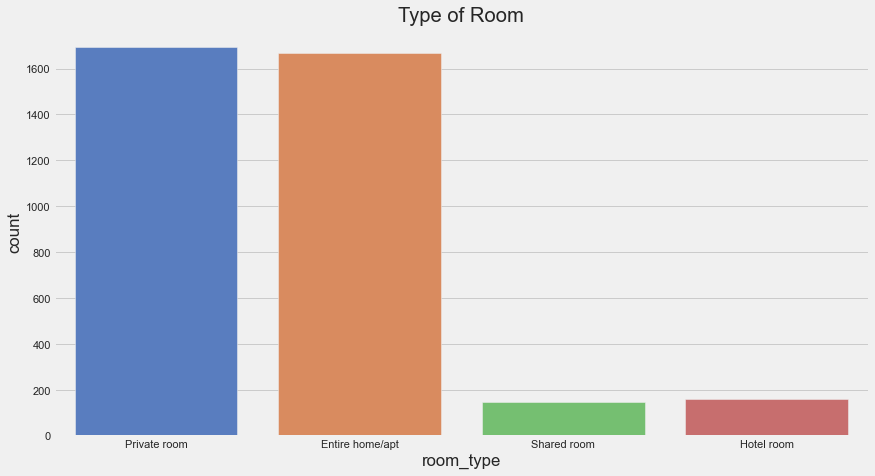

In [114]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(airbnb_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

__we can observe that generally the renting market is dominated by private room and entire home apartment.shared room and hotel room is minority because shared room is less common in Singapore culture and Airbnb has only been accepting hotel listing on 2018.__

C:\Users\liang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



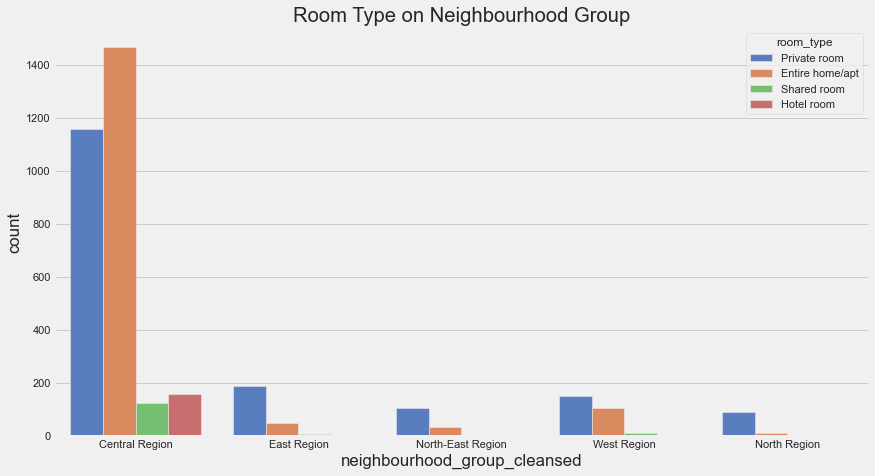

In [116]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group_cleansed,hue=airbnb_df.room_type, palette="muted")
plt.show()

__From the different barchart, we can observed that the Central Region is the only region that is dominated by Enitre home,apartment whereas the rest is dominated the private room. This could be the main reason why the rental price in central
region is pricer/most expensive because the host is only renting the entire apartment instead of the single room.
This suggest that room_type may have a effect on pricing but we need to do more further analysis.__

In [104]:
airbnb_df.nlargest(10, 'number_of_reviews')

,id,new_host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bedrooms,beds,number_of_reviews,availability_365,price
66,2129215.0,65.0,f,Bedok,East Region,1.31936,103.91663,Entire home/apt,1.0,3.0,369.0,239.0,139.0
441,10848771.0,65.0,t,Toa Payoh,Central Region,1.33514,103.87622,Private room,1.0,1.0,354.0,300.0,50.0
104,4108082.0,8.0,f,Tanglin,Central Region,1.29366,103.83006,Entire home/apt,2.0,3.0,312.0,309.0,130.0
183,5827998.0,45.0,t,Tampines,East Region,1.34460,103.96223,Private room,1.0,1.0,296.0,175.0,60.0
162,5377342.0,85.0,t,Rochor,Central Region,1.30551,103.85604,Entire home/apt,1.0,1.0,294.0,55.0,84.0
182,5827713.0,45.0,t,Tampines,East Region,1.34640,103.96256,Private room,1.0,1.0,286.0,365.0,70.0
509,12484261.0,78.0,f,Rochor,Central Region,1.30249,103.86035,Private room,1.0,1.0,274.0,0.0,64.0
167,5493930.0,0.0,t,Novena,Central Region,1.31740,103.84796,Private room,1.0,3.0,266.0,55.0,129.0
2759,43337094.0,100.0,t,Downtown Core,Central Region,1.29658,103.85595,Private room,1.0,1.0,265.0,364.0,134.0
32,1024986.0,67.0,t,River Valley,Central Region,1.29245,103.83742,Entire home/apt,1.0,1.0,255.0,332.0,200.0


__it can be observed that the top ten most popular airbnb area, 7 out of 10 listing is located in the central region
and most of the apartment is either entire home/apt and is generally most pricer than private room which suggested that
room_type affect pricing.__

##  bedroom configurations

In [123]:
#Average price of different bedroom
bed = airbnb_df[['bedrooms','price']].groupby(['bedrooms']).mean()
bed_sorted = bed.sort_values(by='price', ascending=False)
bed_sorted

,price
bedrooms,
4.0,565.307692
3.0,490.037500
2.0,335.606491
6.0,255.000000
8.0,250.000000
5.0,247.800000
0.0,218.139089
1.0,148.080418


In [122]:
#Counting the frequency that a value occur for bedrooms
airbnb_df['bedrooms'].value_counts()

1.0    2487
2.0     493
0.0     417
3.0     240
4.0      26
5.0       5
6.0       2
8.0       1
Name: bedrooms, dtype: int64

__By ignoring the outlier 8 bedroom,6 bedroom and 5 bedroom. Majority of the houses have bedrooms ranging from 1.0 to 4.0. We can alsosee a relationship between bedrooms and price. In general, when a proprety have more bedrooms, the pricing will be more expensive. 1 bedroom average price is 1bedroom(148.08)-> 2bedroom(335.60)->3bedroom(490.03)->4bedroom (565.30). the possible
reason why bed is 0 maybe due to studio apartment.__ 
__to conclude bedrooms do have relationship for pricing.__

## number of bed 

In [125]:
#Average price of different bedroom
bedn = airbnb_df[['beds','price']].groupby(['beds']).mean()
bedn_sorted = bedn.sort_values(by='price', ascending=False)
bedn_sorted

,price
beds,
4.0,518.554878
3.0,399.364912
16.0,269.947368
7.0,265.500000
5.0,260.379310
9.0,240.500000
2.0,225.939759
14.0,211.750000
6.0,191.100000


In [126]:
#Counting the frequency that a value occur for bedrooms
airbnb_df['beds'].value_counts()

1.0     2272
2.0      664
3.0      285
4.0      164
0.0      130
6.0       40
5.0       29
16.0      19
8.0       19
10.0      19
12.0      11
7.0        6
14.0       4
13.0       2
9.0        2
20.0       1
28.0       1
36.0       1
46.0       1
32.0       1
Name: beds, dtype: int64

__by ingoring the outlier 32 bed, 46 bed, 36 bed, 28 bed, 20 bed, 9 bed, 13 bed, 14 bed, 7 bed, 12 bed, 10 bed, 8 bed, 5 bed. Majority of the houses have bed ranging from 1 bed to 4 bed. We can see a relationship between number of bed and price. in general, when a proprety have more bed, the price will be more expensive. 1 bed(158.34) -> 0 bed(169.32) assuming is studio treat as one room also -> 2 bed(225.93) -> 3 bed(399.36) -> 4 bed(518.55).
__there is a relationship between number of bed and price.__

## Review

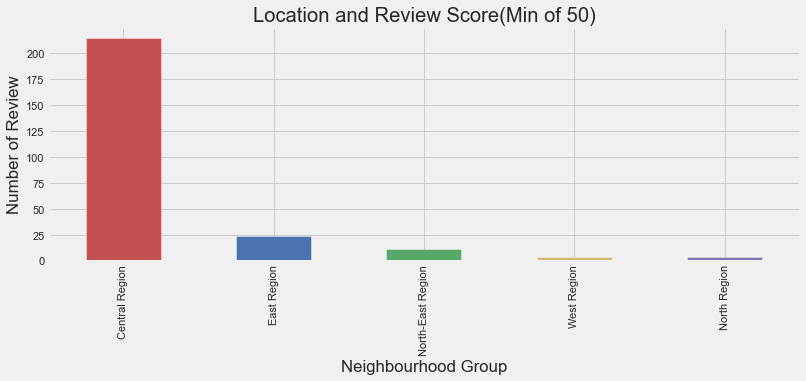

 Count of Review v/s neighbourhood group


,neighbourhood_group_cleansed
Central Region,214
East Region,24
North-East Region,11
West Region,3
North Region,3


In [133]:
fig = plt.figure(figsize=(12,4))
review_50 = airbnb_df[airbnb_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group_cleansed'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

__Review is a very important variable and criteria when accessing a product/service today. This give a insights whether a place is good or not. we set a fliter of >50 review to gain some insights. According to the plot Central region being the most expensive region have the best review compared to other region. Prehaps the services and property in that region is the best in Singapore.__

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

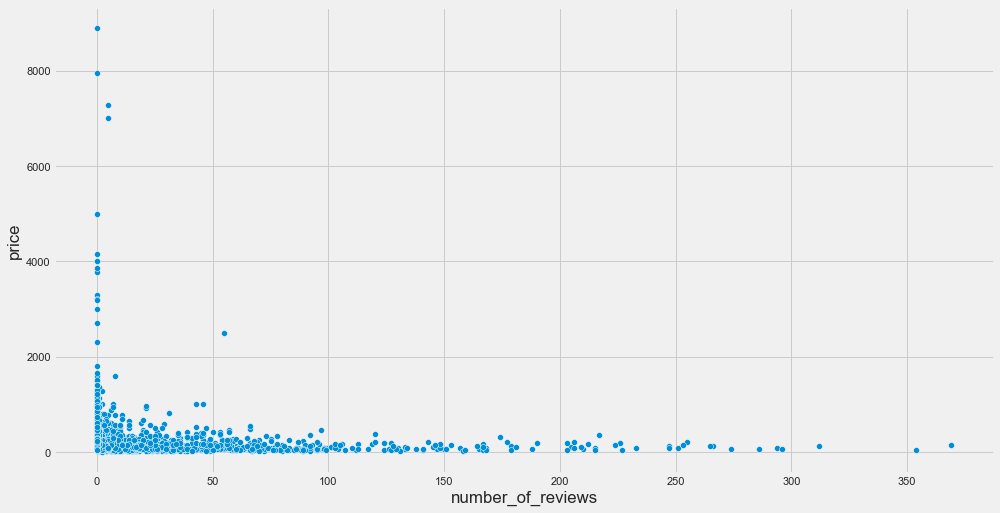

In [135]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df['price'],x=airbnb_df['number_of_reviews'])

##  Availability 365

__A scatterplot is plot to find out whether if there is any price difference based number of reviews. A interesting trend discovered is that proprety that have no little or no review fetch a higher price compared to those who have a lot of review.Most of the property is clustered at the left side possible situation is that people seldom left review. 
There are two possible scenario. 
1)There are 0 review for property because nobody book the property as it is too expensive to book.  
2)Or a potential situation is that property with lower review have higher price.
__can consider using Availability 365 when building the model.

## Relation between neighbourgroup and Availability of Room

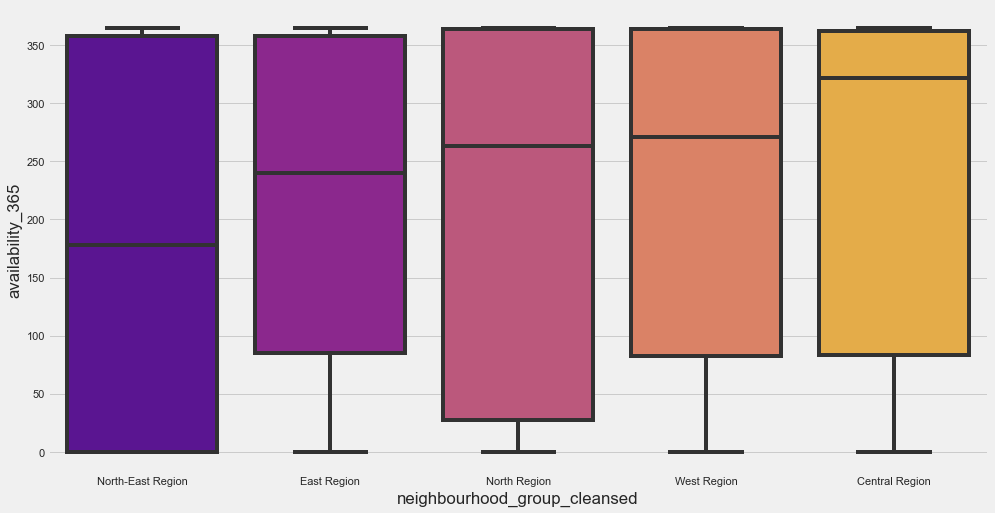

In [136]:
plt.figure(figsize=(15,8))

grouped_2 = airbnb_data.loc[:,['neighbourhood_group_cleansed', 'availability_365']] \
    .groupby(['neighbourhood_group_cleansed']) \
    .median() \
    .sort_values(by='availability_365')

ax = sb.boxplot(data=airbnb_data, x='neighbourhood_group_cleansed',y='availability_365', order=grouped_2.index, palette='plasma')

__Central region known to be the most expensive region in term of pricing have the highest availability compared to the rest of the reigon suggesting that they maybe some relationship between availability_365 and price.

## price vs availability_365

<AxesSubplot:xlabel='availability_365', ylabel='price'>

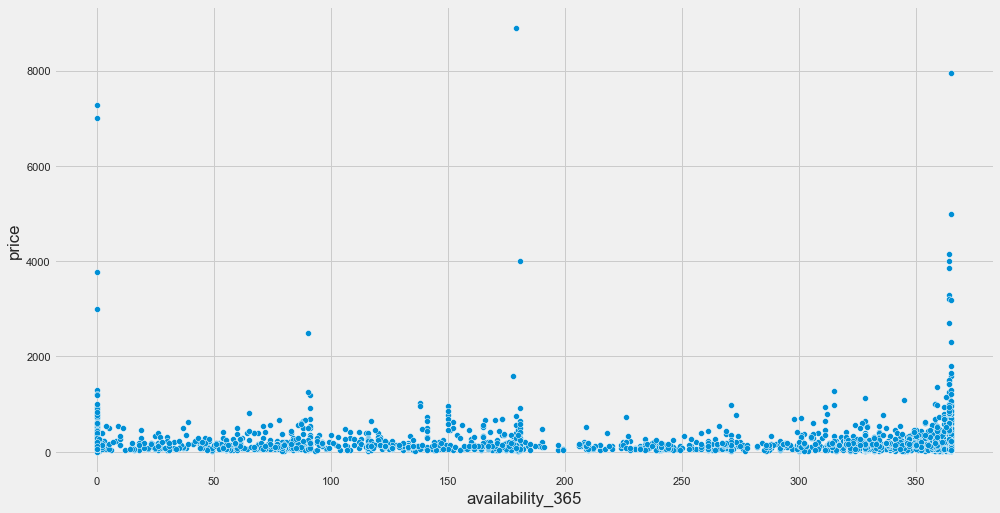

In [134]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df['price'],x=airbnb_df['availability_365'])

__A scatterplot is plot to find out whether if there is any price difference based on the availability and looking at the boxplot it is very hard to interept or show any relationship between prices.

## Host acceptance rate and price

<AxesSubplot:xlabel='new_host_acceptance_rate', ylabel='price'>

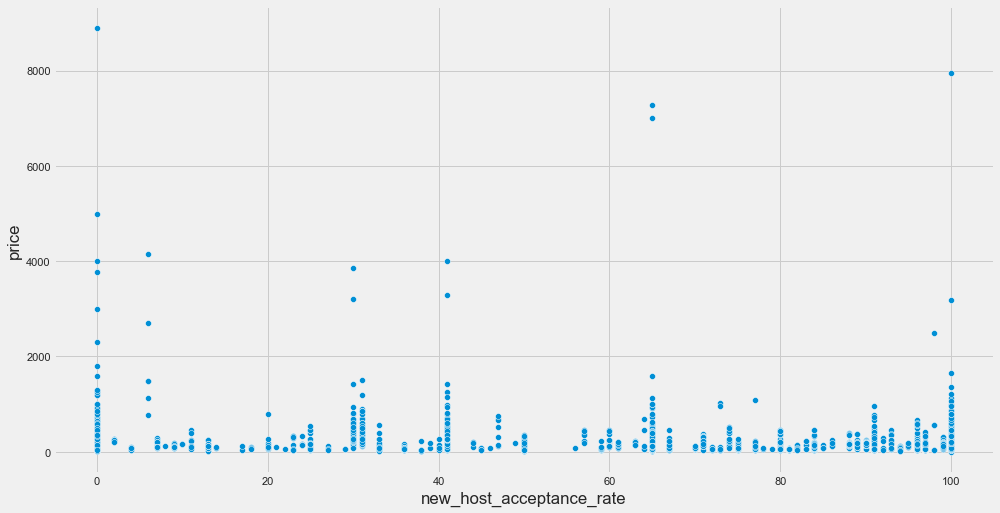

In [150]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=airbnb_df['price'],x=airbnb_df['new_host_acceptance_rate'])

__from the scatterplot, we can observe a trend that generally the higher the host_acceptance_rate, the price will be generally higher.

## wordCloud analysis to find out the most common word appearing

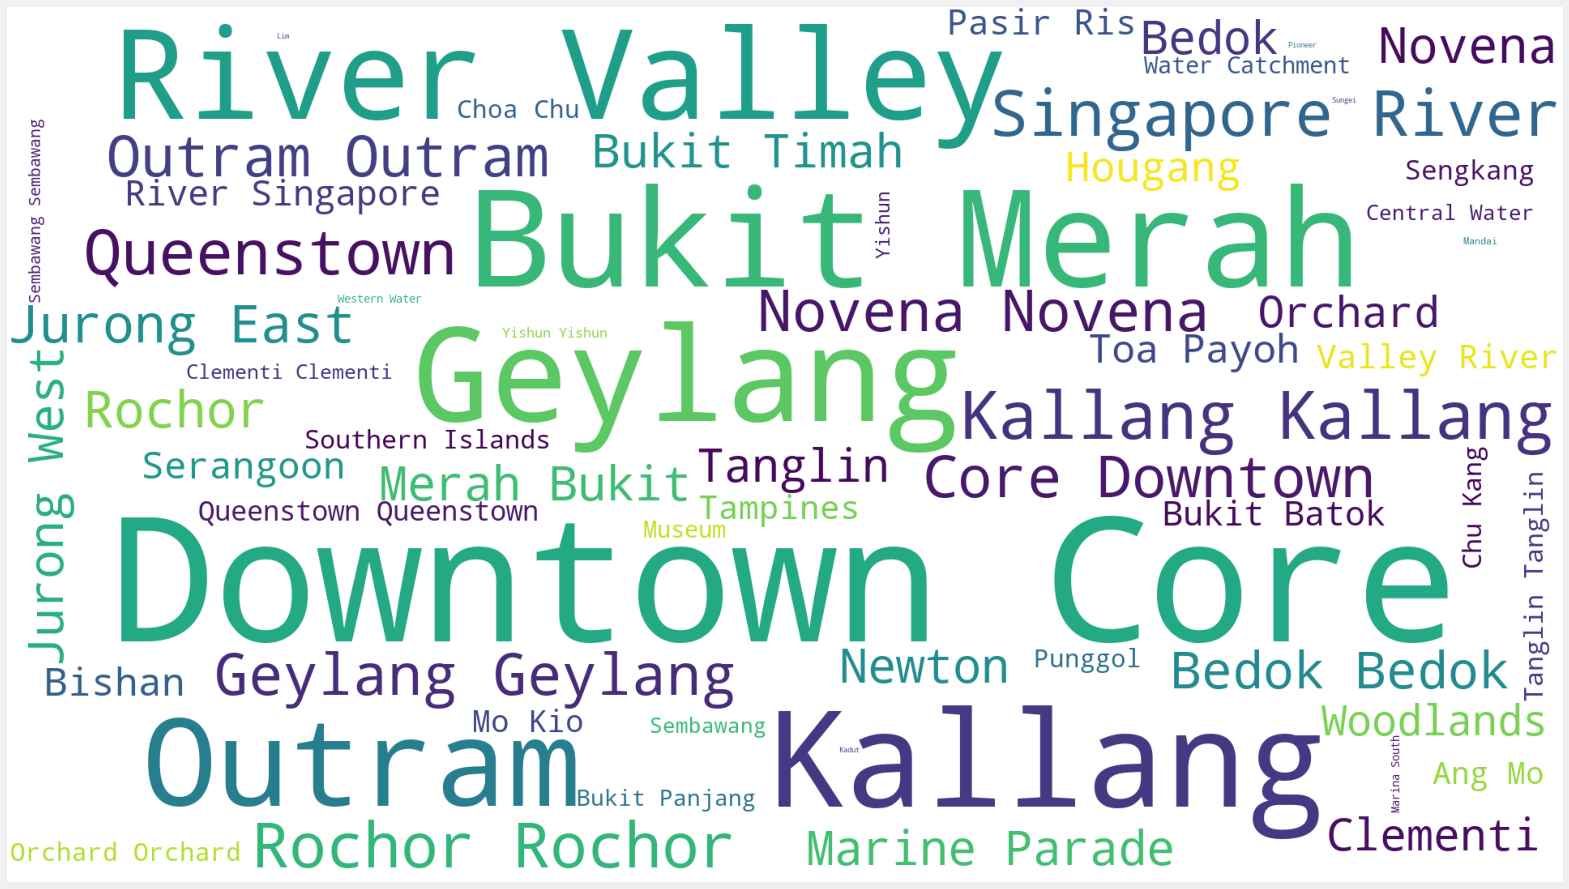

In [147]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb_data.neighbourhood_cleansed))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbour_group.png')
plt.show()

__We can observe that majority of the wordcloud consist keywords from central region for example river valley, kallang, downtown core, outram.__

## Distribution chart

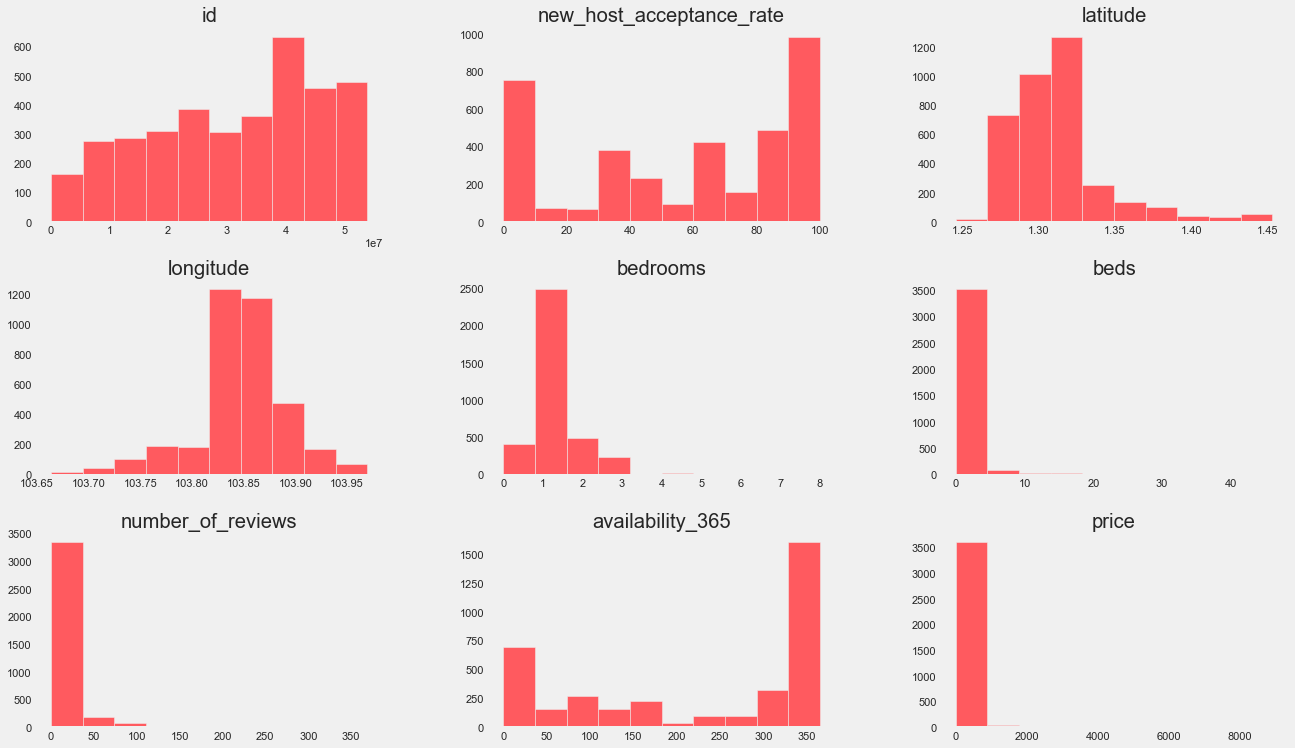

In [155]:
#Viewing distribution of numeric data
_ = airbnb_df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

In [141]:
airbnb_data[['price','new_host_acceptance_rate', 'bedrooms', 'beds', 'number_of_reviews', 'availability_365']].describe()

,price,new_host_acceptance_rate,bedrooms,beds,number_of_reviews,availability_365
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000
mean,206.755652,56.200490,1.182784,1.791882,11.777172,225.244348
std,370.691181,36.966118,0.767236,2.168451,31.865084,145.968915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,30.000000,1.000000,1.000000,0.000000,81.000000
50%,135.000000,65.000000,1.000000,1.000000,1.000000,311.000000
75%,220.000000,91.000000,1.000000,2.000000,7.000000,362.000000
max,8900.000000,100.000000,8.000000,46.000000,369.000000,365.000000


__we can see a huge difference in the range of values present in our numerical features:
price,beds,number of reviews and availability_365. We will use scaling to fix this problem__
__to be done during the model building phase__

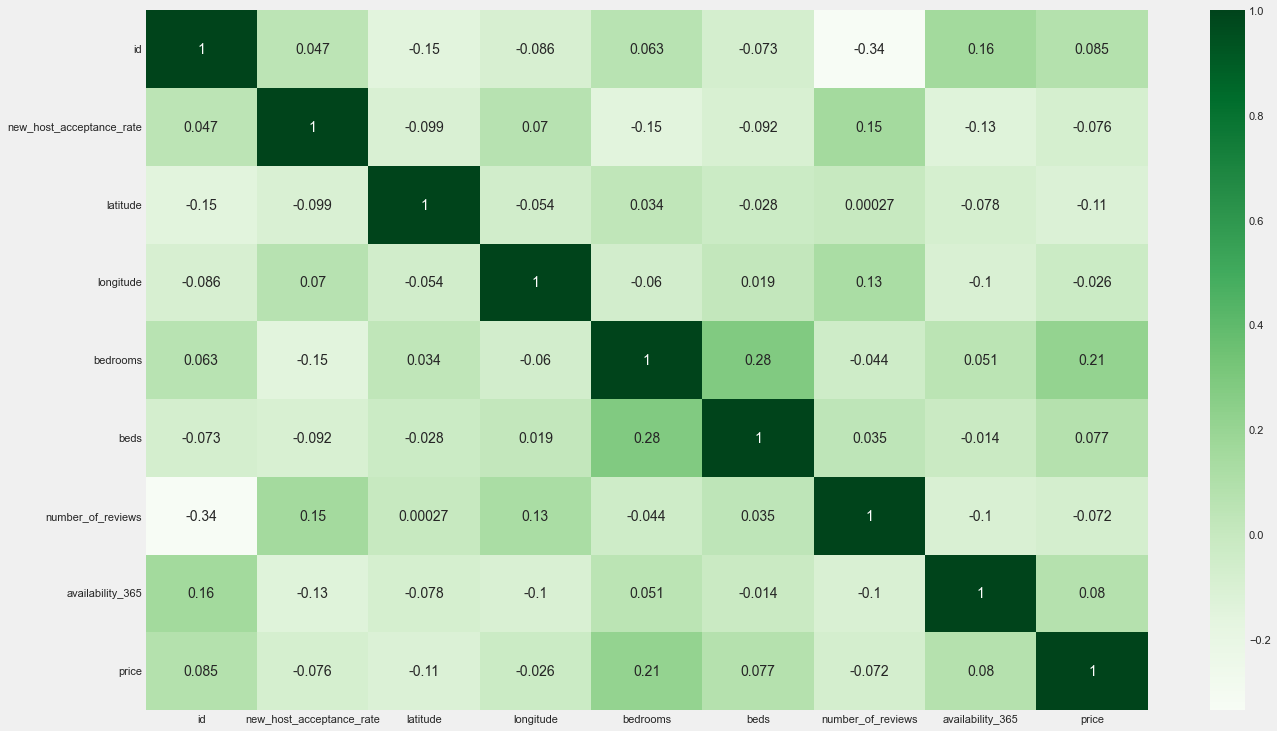

In [140]:
#Vewing correlation of the numerical values
plt.figure(figsize=(20,12))
corrgraph = airbnb_df.corr()
_ = sns.heatmap(corrgraph ,cbar=True,annot=True, cmap="Greens")

## conclusion

1. There were several outlier because the listing price is decided by the host, the team decided to kept the outlier because listing price is arbitrary.
2. Some of the numerical values were either postively skewed or negatively skewed, there is a need to normalize it during the model building
3. Location and region matters for the airbnb rental price since singapore have limited land, city area tend to be more expensive.
4. Bedroom and bed do affect price.
5. Central region have the highest review suggesting that review may affect the price.
6. Central region known to be the most expensive region in term of pricing have the highest availability compared to the rest of the reigon suggesting that they maybe some relationship between availability_365 and price.